# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

#### 1. Is the distribution of body temperatures normal?

In [26]:
df.head()
#df.describe()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Populating the interactive namespace from numpy and matplotlib


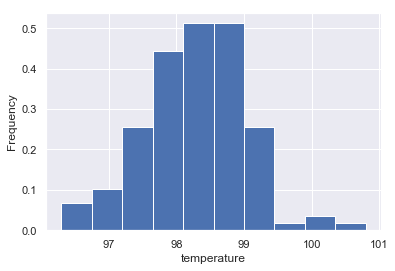

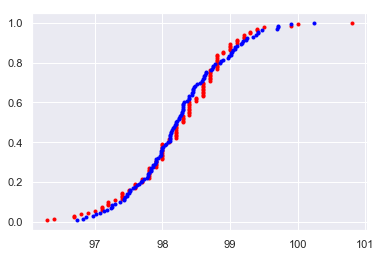

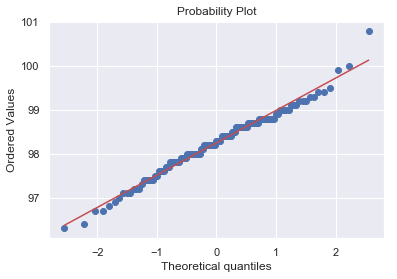

In [18]:
# Your work here.
# Using Scipy.stats and Haker stats of Numpy
import numpy as np
from scipy import stats
#import matplot.pyplot as plt
import seaborn as sn
%pylab inline

df.columns
sn.set()
df['temperature'].plot(kind='hist',normed=True)
plt.xlabel('temperature')
plt.show()

# Define a function to calculator cdf of sample 
def ecdf(sample):
    x=np.sort(sample)
    y=np.arange(1, len(sample)+1)/len(sample)
    return x,y

# Plot cdf of 'temperature' 
temp_x, temp_y = ecdf(df['temperature'])
_ = plt.plot(temp_x, temp_y, marker='.', linestyle='none', color='red')

# Calculate the mean and std of 'temperture'
m=np.mean(df['temperature'])
v=np.std(df['temperature'])

# Draw samples of the same size of 'temperature' from the normal distribution with the mean and std of 'temperture'. And calculate it's cdf.
sim_sample_temp =  np.random.normal(m, v, len(df['temperature']))
sim_sample_temp_x, sim_sample_temp_y = ecdf(sim_sample_temp)
_ = plt.plot(sim_sample_temp_x, sim_sample_temp_y, marker='.', linestyle='none', color='blue')

plt.show()

res = stats.probplot(df['temperature'], plot=plt)

In [13]:
# Using K-S test to see if 'temperature' is normal distribution
stats.kstest(df['temperature'],'norm',args=(m, v))

KstestResult(statistic=0.06385348427882753, pvalue=0.6645320172843266)

#### From EDA plots, it looks like distribution of body temperatures could be normal. And further more, this hypothesis is tested and accepted by K-S test since p-value is greater than 0.05.

#### 2. Is the sample size large? Are the observations independent?
##### The distribution of temperature mean is normal if the sample size is large enough and independent based on entral Limit Theorem. The analysis result shows that the sample size is large and indepedent.

KstestResult(statistic=0.05115458133165551, pvalue=0.8856516847954676)

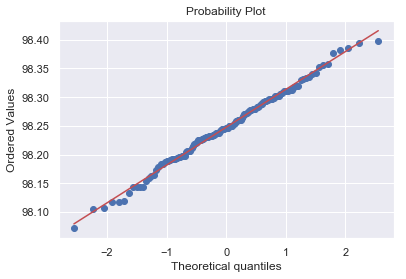

In [54]:
temperature=df['temperature']

# Function for generating bootstrap repicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

bs_reps=draw_bs_reps(temperature,np.mean,len(temperature))

# Testing to see if the distribution of temperature mean is normal
res = stats.probplot(bs_reps, plot=plt)
# Using K-S test to see if mean of 'temperature' is normal distribution
stats.kstest(bs_reps,'norm',args=(np.mean(bs_reps), np.std(bs_reps)))

#### 3. Is the true population mean really 98.6 degrees F?
##### Null hypothesis is " the true population mean really 98.6 degrees F" here. Based on the analysis result, p-value is very small and less than 0.05, so the null hypothesis can not be accepted.

In [82]:
# Using z statistic to do hypothesis test, null hypothesis is the true population mean is 98.6 degrees F is ture.
# z statistic for observed temperature data set
z=(m-98.6)/(v/np.sqrt(len(temperature)))
print(z)

# Define a function for generating bootstrap replicates for z statistic
def draw_bs_z_reps(data, mu, size=1):
    """Draw bootstrap z statistic replicates."""

    # Initialize array of replicates: bs_replicates
    bs_z_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        draw_data = np.random.choice(data, size=len(data))
        bs_z_replicates[i] = (np.mean(draw_data)-mu)/(np.std(draw_data)/np.sqrt(len(draw_data)))
                                                      
    return bs_z_replicates
    
# Shift temperature under null hypothesis
tempShifted = df['temperature'] - m + 98.6

# Generating bootstrap replicates for z statistic
bs_temp_reps = draw_bs_z_reps(tempShifted, 98.6, size=1000)
# Compute p-value
p = np.sum(bs_temp_reps <= z)/1000
print(p)

# If using mean as the test statistic, the codes are as follows.
#bs_temp_reps = draw_bs_reps(tempShifted, np.mean, size=1000)
#bs_temp_reps = draw_bs_reps(tempShifted, z_stat_fun, size=1000)
#p = np.sum(bs_temp_reps <= m)/1000

# If using SciPy instead of hiker statistic of NumPy, the code is as follows.
#stats.ttest_1samp(df['temperature'], 98.6)


-5.4759252020785585
0.0


<h4> 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
</h4>    
1) Assumptions of t statistic
    <ul>
    <li> Sample size is less than 30.
    <li> Population variance is unknown
    </ul>

2) Assumptions of z statistic
    <ul>
    <li> Sample size is exceeding 30
    <li> Population variance is known. But if population variance is unknown, it can be replaced with sample standard deviation.
    </ul>
        
Based on the above rules, t-test should be used here. But since population standard deviation is unknown, the same calculation result is expected using either t statistic or z statistic. 

<h4> 5. At what temperature should we consider someone's temperature to be "abnormal"?<h4>
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
</h4>
    
If the temperatuer is outside of temperature CI, it is considered to be "abnormal".

In [89]:
# temperature - sample data set, m - sample mean, v = sample standard deviation, bs_reps - bootstap samples for temperature mean

# Calculate the CI using bootstrap approach
bs_CI = np.percentile(bs_reps,[2.5,97.5])
print("The temperature CI using bootstrap approach: ",bs_CI)

# Calculate the CI using frequentist approach
sem = np.std(temperature) / np.sqrt(len(temperature))
low_lim = m-sem
upper_lim = m+sem
print("The temperature CI using frequentist approach: ",np.array([low_lim, upper_lim]))

The temperature CI using bootstrap approach:  [98.11709615 98.38092308]
The temperature CI using frequentist approach:  [98.18517415 98.31328738]


<h4> 6. Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</h4>

98.39384615384614 98.10461538461537


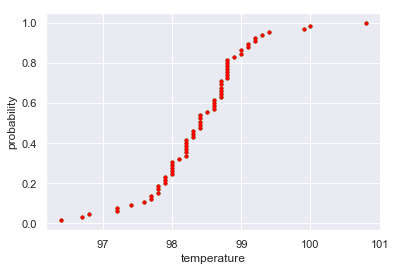

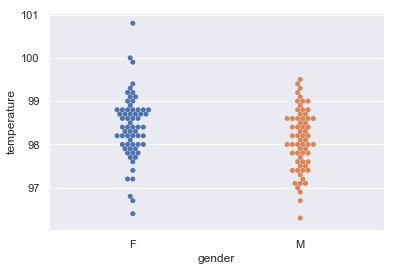

In [107]:
#split df into two groups per gender
temp_f = df[df.gender == 'F']
temp_f.head()
temp_m = df[df.gender == 'M']
mean_f_temp = np.mean(temp_f['temperature'])
mean_m_temp = np.mean(temp_m['temperature'])
print(mean_f_temp,mean_m_temp)

# EDA
ecdf_f, ecdf_y_f = ecdf(temp_f['temperature'])
_ = plt.plot(ecdf_f,ecdf_y_f,marker='.',linestyle='none', color='green')
ecdf_m, ecdf_y_m = ecdf(temp_f['temperature'])
_ = plt.plot(ecdf_m,ecdf_y_m,marker='.',linestyle='none', color='red')
_ = plt.xlabel('temperature')
_ = plt.ylabel('probability')

plt.show()

_ = sn.swarmplot(x='gender', y='temperature',data=df)
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')
plt.show()

<h4> Significant difference in temperature between females and males is not showed from ECDF plot. But from the swarm plot, it looks like females have higer mean temperature. Need to do Hypothesis Test. 
    <li>H0: f_meanTemp_pl - m_meantemp_pl = 0
    <li>H1: f_meanTemp_pl - m_meantemp_pl > 0

In [118]:
# Hypothesis tesing using bootstrap approach

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Observed mean temperature difference between females and males
mean_diff_obs = mean_f_temp - mean_m_temp

# Bootstrap replicates of mean temperature difference between females and males
perm_reps = draw_perm_reps(temp_f['temperature'], temp_m['temperature'], diff_of_means, size = 1000)

#p-value
p = np.sum(perm_reps >= mean_diff_obs)/len(perm_reps)
print("p-value: ",p)



p-value:  0.009


<h4>Since p-value is less than 0.05, H0 is rejected.

In [119]:
# Frequentist approach